### Git HUB
https://github.com/bnsreenu/python_for_image_processing_APEER
https://www.youtube.com/watch?v=qfUJHY3ku9k&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=56

In [4]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np
import cv2

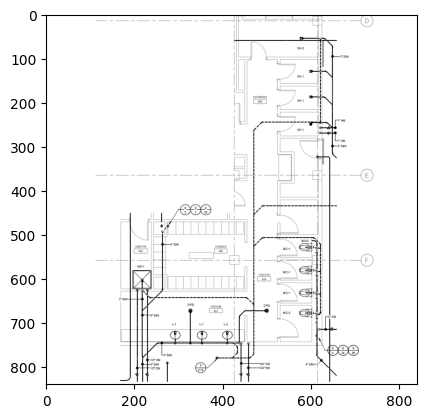

In [5]:
# Step 1: Read the Input Image
image_path = r'C:\Suraj\projects\openCv\data\projdata\sample\input_image.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the result
# cv2.imshow('Input Image', image)
# cv2.imshow('Gray Image', gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(image, cmap='gray')

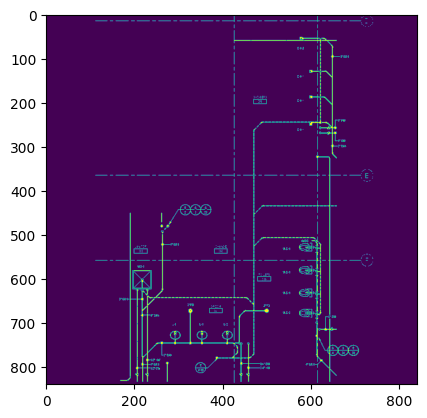

In [9]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(gray)

#Generate thresholded image
thresholded_img = gray < threshold
plt.imshow(thresholded_img)

In [26]:
def nothing(x):
    pass

cv2.namedWindow("BilaterFilter")
cv2.createTrackbar("d", "BilaterFilter", 3, 50, nothing)
cv2.createTrackbar("sigmaColor", "BilaterFilter", 0, 500, nothing)
cv2.createTrackbar("sigmaSpace", "BilaterFilter", 0, 500, nothing)

while True:
    d = cv2.getTrackbarPos('d', 'BilaterFilter')
    sigmaColor = cv2.getTrackbarPos('sigmaColor', 'BilaterFilter')
    sigmaSpace = cv2.getTrackbarPos('sigmaSpace', 'BilaterFilter')

    
    bi_f = cv2.bilateralFilter(gray, d, sigmaColor, sigmaSpace)
    cv2.imshow("BilaterFilter", bi_f)
    k = cv2.waitKey(1)
    if k == ord("q"):
        break

cv2.destroyAllWindows()

In [27]:
def nothing(x):
    pass

cv2.namedWindow("Threshold")
cv2.createTrackbar("a", "Threshold", 0, 255, nothing)
cv2.createTrackbar("b", "Threshold", 10, 255, nothing)

while True:
    a = cv2.getTrackbarPos('a', 'Threshold')
    b = cv2.getTrackbarPos('b', 'Threshold')
    
    
    ret,thresh = cv2.threshold(bi_f,a,b,cv2.THRESH_BINARY_INV)
    cv2.imshow("Threshold", thresh)
    k = cv2.waitKey(1)
    if k == ord("q"):
        break

cv2.destroyAllWindows()

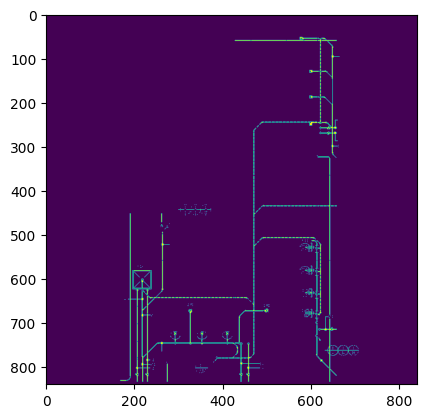

In [31]:
#Remove edge touching regions
from skimage.segmentation import clear_border
edge_touching_removed = clear_border(thresh)
plt.imshow(edge_touching_removed)

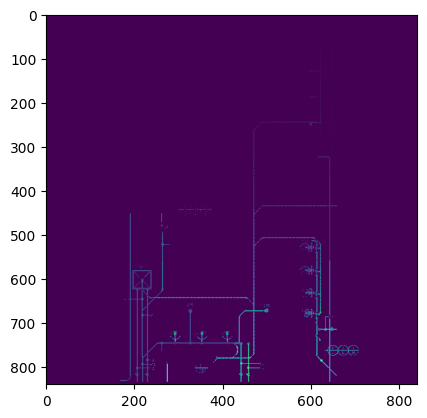

In [32]:
#Label connected regions of an integer array using measure.label
#Labels each connected entity as one object
#Connectivity = Maximum number of orthogonal hops to consider a pixel/voxel as a neighbor. 
#If None, a full connectivity of input.ndim is used, number of dimensions of the image
#For 2D image it would be 2

label_image = measure.label(edge_touching_removed, connectivity=gray.ndim)
plt.imshow(label_image)

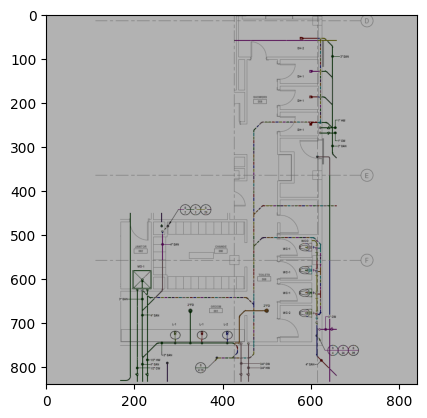

In [33]:
image_label_overlay = label2rgb(label_image, image=gray)
plt.imshow(image_label_overlay)

plt.imsave("labeled_cast_iron.jpg", image_label_overlay) 
cv2.imshow('Gray labeled_cast_iron', image_label_overlay)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
#Calculate properties
#Using regionprops or regionprops_table
all_props=measure.regionprops(label_image, image)
#Can print various parameters for all objects
for prop in all_props:
    print('Label: {} Area: {}'.format(prop.label, prop.area))

Label: 1 Area: 105.0
Label: 2 Area: 7.0
Label: 3 Area: 126.0
Label: 4 Area: 371.0
Label: 5 Area: 878.0
Label: 6 Area: 14.0
Label: 7 Area: 13.0
Label: 8 Area: 14.0
Label: 9 Area: 13.0
Label: 10 Area: 13.0
Label: 11 Area: 14.0
Label: 12 Area: 14.0
Label: 13 Area: 28.0
Label: 14 Area: 68.0
Label: 15 Area: 13.0
Label: 16 Area: 13.0
Label: 17 Area: 14.0
Label: 18 Area: 14.0
Label: 19 Area: 13.0
Label: 20 Area: 31.0
Label: 21 Area: 56.0
Label: 22 Area: 7.0
Label: 23 Area: 14.0
Label: 24 Area: 13.0
Label: 25 Area: 13.0
Label: 26 Area: 14.0
Label: 27 Area: 14.0
Label: 28 Area: 34.0
Label: 29 Area: 22.0
Label: 30 Area: 28.0
Label: 31 Area: 13.0
Label: 32 Area: 14.0
Label: 33 Area: 14.0
Label: 34 Area: 13.0
Label: 35 Area: 13.0
Label: 36 Area: 14.0
Label: 37 Area: 13.0
Label: 38 Area: 13.0
Label: 39 Area: 14.0
Label: 40 Area: 13.0
Label: 41 Area: 91.0
Label: 42 Area: 8.0
Label: 43 Area: 2.0
Label: 44 Area: 2.0
Label: 45 Area: 18.0
Label: 46 Area: 2.0
Label: 47 Area: 2.0
Label: 48 Area: 16.0
Labe

In [35]:
#Compute image properties and return them as a pandas-compatible table.
#Available regionprops: area, bbox, centroid, convex_area, coords, eccentricity,
# equivalent diameter, euler number, label, intensity image, major axis length, 
#max intensity, mean intensity, moments, orientation, perimeter, solidity, and many more

props = measure.regionprops_table(label_image, gray, 
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity'])

In [36]:
import pandas as pd
df = pd.DataFrame(props)
# print(df.head())

#To delete small regions...
# df = df[df['area'] > 50]
df.head()

,label,area,equivalent_diameter,mean_intensity,solidity
0,1,105.0,11.562446,0.000000,0.606936
1,2,7.0,2.985411,0.000000,0.777778
2,3,126.0,12.666025,1.000000,0.394984
3,4,371.0,21.734118,0.000000,0.991979
4,5,878.0,33.435076,1.247153,0.099705


In [38]:
scale = 0.4
df['length_feet'] = df['equivalent_diameter'] * (scale**2)
df['equivalent_diameter_microns'] = df['equivalent_diameter'] * (scale)

In [39]:
df.length_feet.sum()

267.56333383011554